In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Dataset

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load data via url
url = '/content/drive/MyDrive/DATASETS/hepatitis/hepatitis.data'
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [5]:
df.columns = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABE', 'SPIDERS', 'ASCITIES',
           'VARICES', 'BILIRUBIN', 'ALK_PHOSPATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LVER_BIG,LIVER_FIRM,SPLEEN_PALPABE,SPIDERS,ASCITIES,VARICES,BILIRUBIN,ALK_PHOSPATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [6]:
# bagian 1.1
# meentukan tipe data dengan fungsi dtypes
df.dtypes

Class              int64
AGE                int64
SEX                int64
STEROID           object
ANTIVIRALS         int64
FATIGUE           object
MALAISE           object
ANOREXIA          object
LVER_BIG          object
LIVER_FIRM        object
SPLEEN_PALPABE    object
SPIDERS           object
ASCITIES          object
VARICES           object
BILIRUBIN         object
ALK_PHOSPATE      object
SGOT              object
ALBUMIN           object
PROTIME           object
HISTOLOGY          int64
dtype: object

## Pre-processing

In [7]:
#mengganti data yang bernilai ? dengan NaN untuk mengetahui cell yang kosong
df.replace("?", np.nan, inplace=True)
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            1
ANTIVIRALS         0
FATIGUE            1
MALAISE            1
ANOREXIA           1
LVER_BIG          10
LIVER_FIRM        11
SPLEEN_PALPABE     5
SPIDERS            5
ASCITIES           5
VARICES            5
BILIRUBIN          6
ALK_PHOSPATE      29
SGOT               4
ALBUMIN           16
PROTIME           67
HISTOLOGY          0
dtype: int64

In [8]:
#isi cell yang kosong dengan nilai tengah tiap kolom/atribut
df.fillna(df.median(), inplace=True)
df.isnull().sum()

Class             0
AGE               0
SEX               0
STEROID           0
ANTIVIRALS        0
FATIGUE           0
MALAISE           0
ANOREXIA          0
LVER_BIG          0
LIVER_FIRM        0
SPLEEN_PALPABE    0
SPIDERS           0
ASCITIES          0
VARICES           0
BILIRUBIN         0
ALK_PHOSPATE      0
SGOT              0
ALBUMIN           0
PROTIME           0
HISTOLOGY         0
dtype: int64

In [9]:
#hapus data duplikat
df.drop_duplicates()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LVER_BIG,LIVER_FIRM,SPLEEN_PALPABE,SPIDERS,ASCITIES,VARICES,BILIRUBIN,ALK_PHOSPATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,61.0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,61.0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,61.0,1
3,2,31,1,2.0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85.0,200,4.0,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,85.0,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,61.0,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,61.0,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           155 non-null    int64 
 1   AGE             155 non-null    int64 
 2   SEX             155 non-null    int64 
 3   STEROID         155 non-null    object
 4   ANTIVIRALS      155 non-null    int64 
 5   FATIGUE         155 non-null    object
 6   MALAISE         155 non-null    object
 7   ANOREXIA        155 non-null    object
 8   LVER_BIG        155 non-null    object
 9   LIVER_FIRM      155 non-null    object
 10  SPLEEN_PALPABE  155 non-null    object
 11  SPIDERS         155 non-null    object
 12  ASCITIES        155 non-null    object
 13  VARICES         155 non-null    object
 14  BILIRUBIN       155 non-null    object
 15  ALK_PHOSPATE    155 non-null    object
 16  SGOT            155 non-null    object
 17  ALBUMIN         155 non-null    object
 18  PROTIME   

In [11]:
#rubah format data
df["STEROID"] = df["STEROID"].astype('int64')
df["FATIGUE"] = df["FATIGUE"].astype('int64')
df["MALAISE"] = df["MALAISE"].astype('int64')
df["ANOREXIA"] = df["ANOREXIA"].astype('int64')
df["LVER_BIG"] = df["LVER_BIG"].astype('int64')
df["LIVER_FIRM"] = df["LIVER_FIRM"].astype('int64')
df["SPLEEN_PALPABE"] = df["SPLEEN_PALPABE"].astype('int64')
df["SPIDERS"] = df["SPIDERS"].astype('int64')
df["ASCITIES"] = df["ASCITIES"].astype('int64')
df["VARICES"] = df["VARICES"].astype('int64')
df["BILIRUBIN"] = df["BILIRUBIN"].astype('float')
df["ALK_PHOSPATE"] = df["ALK_PHOSPATE"].astype('int64')
df["SGOT"] = df["SGOT"].astype('int64')
df["ALBUMIN"] = df["ALBUMIN"].astype('float')
df["PROTIME"] = df["PROTIME"].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           155 non-null    int64  
 1   AGE             155 non-null    int64  
 2   SEX             155 non-null    int64  
 3   STEROID         155 non-null    int64  
 4   ANTIVIRALS      155 non-null    int64  
 5   FATIGUE         155 non-null    int64  
 6   MALAISE         155 non-null    int64  
 7   ANOREXIA        155 non-null    int64  
 8   LVER_BIG        155 non-null    int64  
 9   LIVER_FIRM      155 non-null    int64  
 10  SPLEEN_PALPABE  155 non-null    int64  
 11  SPIDERS         155 non-null    int64  
 12  ASCITIES        155 non-null    int64  
 13  VARICES         155 non-null    int64  
 14  BILIRUBIN       155 non-null    float64
 15  ALK_PHOSPATE    155 non-null    int64  
 16  SGOT            155 non-null    int64  
 17  ALBUMIN         155 non-null    flo

## Visualize data

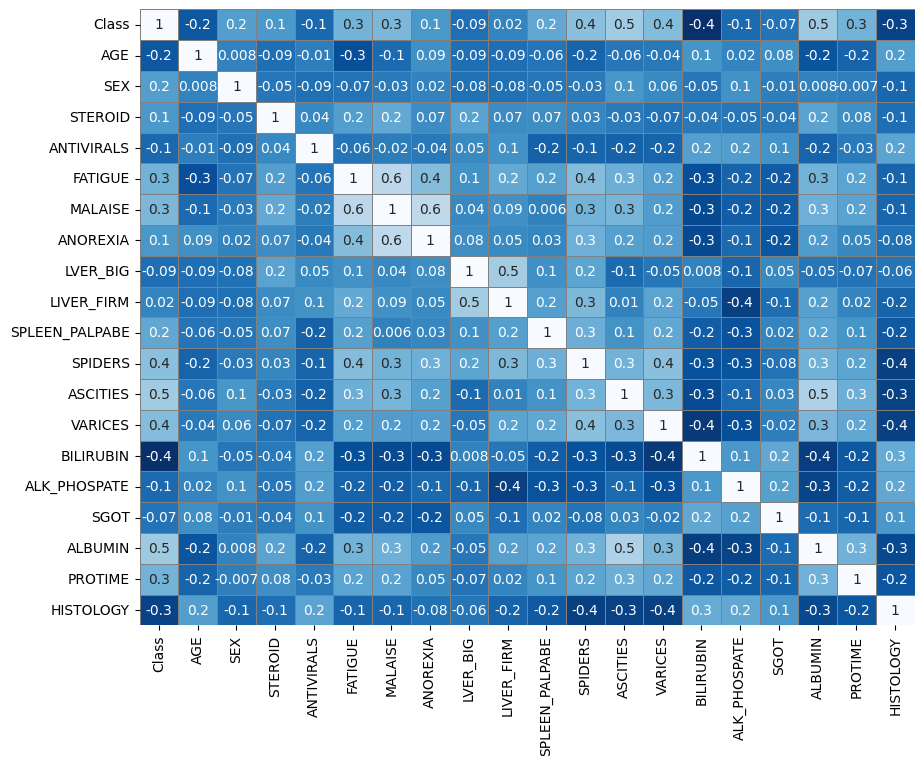

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

## Spliting Data

In [23]:
X = df.iloc[:,1:19]
y = df['Class']
len(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# len(X_train), len(X_test)

155

## normalisasi data

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Permodelan

## KNN

In [16]:
knn = KNeighborsClassifier()
KNN_score = cross_val_score(knn, X, y, cv=5)
print("KNN Classifier Accuracy :", KNN_score*100)
print("Average KNN Classifier Accuracy :", (KNN_score.mean()*100), "with a standard deviation of:", (KNN_score.std()*100))

KNN Classifier Accuracy : [74.19354839 74.19354839 77.41935484 77.41935484 77.41935484]
Average KNN Classifier Accuracy : 76.12903225806453 with a standard deviation of: 1.5803159630859198


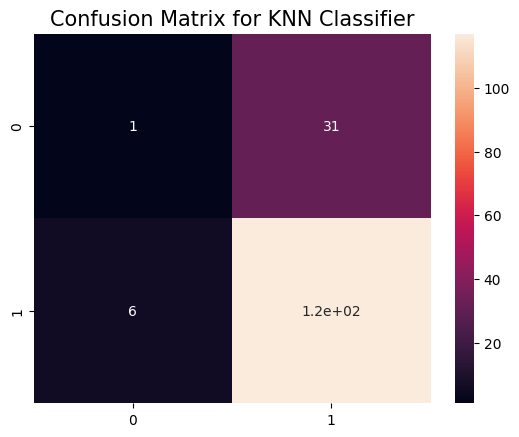

In [21]:
knn_predict = cross_val_predict(knn, X, y, cv = 5)
cf_matrix_knn = confusion_matrix(y, knn_predict)
sns.heatmap(cf_matrix_knn, annot=True)
plt.title("Confusion Matrix for KNN Classifier", fontsize=15);

In [22]:
print("Classification Report: \n",classification_report(y, knn_predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.14      0.03      0.05        32
           2       0.79      0.95      0.86       123

    accuracy                           0.76       155
   macro avg       0.47      0.49      0.46       155
weighted avg       0.66      0.76      0.70       155



## Gaussian Naive Bayes

In [29]:
gnb = GaussianNB()
GNB_score = cross_val_score(gnb, X, y, cv=5)
print("GNB Classifier Accuracy :", GNB_score*100)
print("Average KNN Classifier Accuracy :", (GNB_score.mean()*100), "with a standard deviation of:", (GNB_score.std()*100))

GNB Classifier Accuracy : [87.09677419 87.09677419 74.19354839 74.19354839 64.51612903]
Average KNN Classifier Accuracy : 77.41935483870968 with a standard deviation of: 8.655747009676606


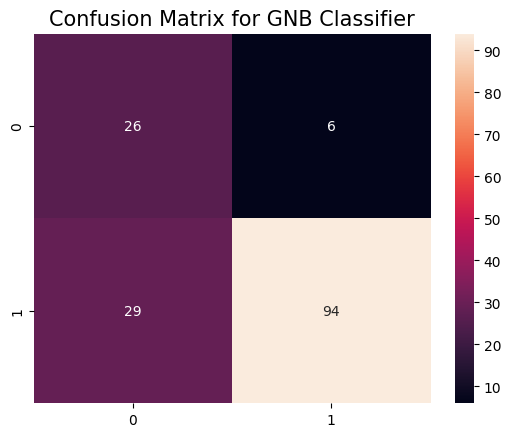

In [30]:
gnb_predict = cross_val_predict(gnb, X, y, cv = 5)
cf_matrix_gnb = confusion_matrix(y, gnb_predict)
sns.heatmap(cf_matrix_gnb, annot=True)
plt.title("Confusion Matrix for GNB Classifier", fontsize=15);

In [31]:
print("Classification Report: \n",classification_report(y, gnb_predict))

Classification Report: 
               precision    recall  f1-score   support

           1       0.47      0.81      0.60        32
           2       0.94      0.76      0.84       123

    accuracy                           0.77       155
   macro avg       0.71      0.79      0.72       155
weighted avg       0.84      0.77      0.79       155

